In [81]:
%run Utils.py

In [25]:
df = get_data('shooting',2023, 'EPL', 'FW')

100%|██████████| 11/11 [02:54<00:00, 15.86s/it]


In [26]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [27]:
forwards = filter_position(df, 'FW')
forwards.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,Unnamed: 27,Unnamed: 28
0,3,Che Adams,sct SCO,FW,Southampton,26,1996,22.1,5,47,...,0,0,6.6,6.6,0.14,-1.6,-1.6,Matches,https://fbref.com/en/players/f2bf1b0f/Che-Adams,f2bf1b0f
1,18,Miguel Almirón,py PAR,FW,Newcastle Utd,28,1994,27.7,11,69,...,0,0,8.0,8.0,0.12,3.0,3.0,Matches,https://fbref.com/en/players/862a1c15/Miguel-A...,862a1c15
2,25,Michail Antonio,jm JAM,FW,West Ham,32,1990,20.3,5,39,...,0,0,6.6,6.6,0.17,-1.6,-1.6,Matches,https://fbref.com/en/players/ac05f970/Michail-...,ac05f970
3,26,Antony,br BRA,FW,Manchester Utd,22,2000,20.0,4,72,...,0,0,6.6,6.6,0.09,-2.6,-2.6,Matches,https://fbref.com/en/players/99127249/Antony,99127249
4,33,Pierre-Emerick Aubameyang,ga GAB,FW,Chelsea,33,1989,6.2,1,16,...,0,0,1.5,1.5,0.09,-0.5,-0.5,Matches,https://fbref.com/en/players/d5dd5f1f/Pierre-E...,d5dd5f1f


In [28]:
forwards.dtypes

Rk               int64
Player          object
Nation          object
Pos             object
Squad           object
Age              int64
Born             int64
90s            float64
Gls              int64
Sh               int64
SoT              int64
SoT%           float64
Sh/90          float64
SoT/90         float64
G/Sh           float64
G/SoT          float64
Dist           float64
FK               int64
PK               int64
PKatt            int64
xG             float64
npxG           float64
npxG/Sh        float64
G-xG           float64
np:G-xG        float64
Matches         object
Unnamed: 27     object
Unnamed: 28     object
dtype: object

In [66]:
forwards = forwards[[ 'Player',  'Age', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG']]

In [67]:
forwards['Age']=forwards['Age'].astype('int64')

c:\Users\Dave\Projects\FPL\FPL\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
forwards[[ 'Age', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG']] =forwards[[ 'Age', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG']].apply(pd.to_numeric)

c:\Users\Dave\Projects\FPL\FPL\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [69]:
forwards.isna().sum()

Player      0
Age         0
90s         0
Gls         0
Sh          0
SoT         0
SoT%        9
Sh/90       0
SoT/90      0
G/Sh        9
G/SoT      12
Dist        9
FK          0
PK          0
PKatt       0
xG          0
npxG        0
npxG/Sh     9
G-xG        0
np:G-xG     0
dtype: int64

In [70]:
forwards[['90s','Sh','Gls','SoT','G/Sh','G/SoT']]

,90s,Sh,Gls,SoT,G/Sh,G/SoT
0,22.1,47,5,14,0.11,0.36
1,27.7,69,11,20,0.16,0.55
2,20.3,39,5,13,0.13,0.38
3,20.0,72,4,24,0.06,0.17
4,6.2,16,1,7,0.06,0.14
...,...,...,...,...,...,...
81,20.9,70,18,31,0.21,0.48
82,12.2,18,2,4,0.11,0.50
83,17.8,32,7,15,0.22,0.47
84,5.0,8,2,3,0.13,0.33


In [71]:
forwards.head()

,Player,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Che Adams,26,22.1,5,47,14,29.8,2.12,0.63,0.11,0.36,13.8,0,0,0,6.6,6.6,0.14,-1.6,-1.6
1,Miguel Almirón,28,27.7,11,69,20,29.0,2.49,0.72,0.16,0.55,16.4,0,0,0,8.0,8.0,0.12,3.0,3.0
2,Michail Antonio,32,20.3,5,39,13,33.3,1.92,0.64,0.13,0.38,11.6,0,0,0,6.6,6.6,0.17,-1.6,-1.6
3,Antony,22,20.0,4,72,24,33.3,3.60,1.20,0.06,0.17,19.6,0,0,0,6.6,6.6,0.09,-2.6,-2.6
4,Pierre-Emerick Aubameyang,33,6.2,1,16,7,43.8,2.60,1.14,0.06,0.14,13.7,0,0,0,1.5,1.5,0.09,-0.5,-0.5


In [82]:
get_mins(forwards,'90s')

c:\Users\Dave\Projects\FPL\Utils.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0     1989.0
1     2493.0
2     1827.0
3     1800.0
4      558.0
       ...  
81    1881.0
82    1098.0
83    1602.0
84     450.0
85     369.0
Name: 90s, Length: 86, dtype: float64

In [83]:
forwards.head()

,Player,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Cluster,Mins
0,Che Adams,26,22.1,5,47,14,29.8,2.12,0.63,0.11,...,0,0,0,6.6,6.6,0.14,-1.6,-1.6,3,1989.0
1,Miguel Almirón,28,27.7,11,69,20,29.0,2.49,0.72,0.16,...,0,0,0,8.0,8.0,0.12,3.0,3.0,1,2493.0
2,Michail Antonio,32,20.3,5,39,13,33.3,1.92,0.64,0.13,...,0,0,0,6.6,6.6,0.17,-1.6,-1.6,3,1827.0
3,Antony,22,20.0,4,72,24,33.3,3.60,1.20,0.06,...,0,0,0,6.6,6.6,0.09,-2.6,-2.6,3,1800.0
4,Pierre-Emerick Aubameyang,33,6.2,1,16,7,43.8,2.60,1.14,0.06,...,0,0,0,1.5,1.5,0.09,-0.5,-0.5,4,558.0


In [84]:
x = forwards[['Age',
            'Gls',
            'Sh',
            'SoT',
            'SoT%',
            'Sh/90',
            'SoT/90',
            'G/Sh',
            'G/SoT',
            'Dist',
            'FK',
            'xG',
            'npxG',
            'npxG/Sh',
            'G-xG',
            'np:G-xG',
            'Mins']]

In [85]:
forwards=get_cluster(forwards,x,5,'Gls_90total')

c:\Users\Dave\Projects\FPL\Utils.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


(-1.85, 40.0)

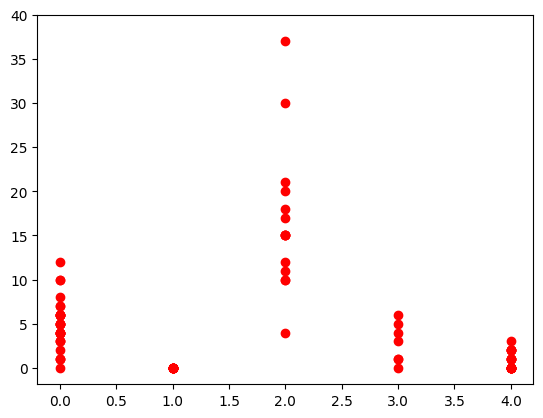

In [61]:
import matplotlib.pyplot as plt 

plt.plot(forwards['Cluster'],forwards[( 'Calculated',     'Goals')],'ro')
plt.xlim(left=-0.2)
plt.ylim(top=40)

In [57]:
forwards.loc[forwards['Cluster']==2]

Unnamed: 1_level_0 Unnamed: 5_level_0 Unnamed: 7_level_0 Standard        \
                 Player                Age                90s      Gls    Sh   
1        Miguel Almirón                 28               27.7     0.40  2.49   
3                Antony                 22               20.0     0.20  3.60   
27       Erling Haaland                 22               30.8     1.17  3.77   
35        Gabriel Jesus                 25               22.9     0.48  3.32   
39           Harry Kane                 29               37.8     0.79  3.28   
43   Gabriel Martinelli                 21               31.0     0.48  2.55   
46         Bryan Mbeumo                 22               32.3     0.28  2.17   
48  Aleksandar Mitrović                 27               22.3     0.63  3.81   
55         Darwin Núñez                 23               18.8     0.48  4.47   
59      Marcus Rashford                 24               32.0     0.53  3.38   
63          Bukayo Saka                 20               35.3     0.40  2.44   
64        Mohamed Salah                 30               36.6     0.52  3.31   
74           Ivan Toney                 26               32.8     0.61  2.65   
78        Ollie Watkins                 26               34.7     0.43  2.42   
81        Callum Wilson                 30               20.9     0.86  3.35   

                                   ...       Expected                      \
     SoT  SoT% Sh/90 SoT/90  G/Sh  ...    FK       xG  npxG npxG/Sh  G-xG   
1   0.72  29.0  2.49   0.72  0.16  ...  0.00     0.29  0.29    0.12  0.11   
3   1.20  33.3  3.60   1.20  0.06  ...  0.00     0.33  0.33    0.09 -0.13   
27  1.72  45.7  3.77   1.72  0.25  ...  0.00     0.92  0.75    0.20  0.25   
35  1.35  40.8  3.31   1.35  0.13  ...  0.00     0.61  0.58    0.18 -0.13   
39  1.43  43.5  3.28   1.43  0.20  ...  0.08     0.57  0.44    0.13  0.22   
43  0.97  38.0  2.55   0.97  0.19  ...  0.06     0.30  0.30    0.12  0.18   
46  0.99  45.7  2.17   0.99  0.11  ...  0.03     0.30  0.28    0.13 -0.02   
48  1.21  31.8  3.81   1.21  0.12  ...  0.00     0.67  0.39    0.10 -0.04   
55  1.86  41.7  4.46   1.86  0.11  ...  0.00     0.64  0.64    0.14 -0.16   
59  1.53  45.4  3.38   1.53  0.16  ...  0.22     0.48  0.48    0.15  0.05   
63  0.82  33.7  2.43   0.82  0.14  ...  0.03     0.32  0.26    0.11  0.08   
64  1.23  37.2  3.31   1.23  0.14  ...  0.05     0.59  0.51    0.15 -0.07   
74  1.01  37.9  2.65   1.01  0.16  ...  0.27     0.57  0.40    0.15  0.04   
78  1.30  53.6  2.42   1.30  0.17  ...  0.00     0.48  0.43    0.18 -0.04   
81  1.48  44.3  3.36   1.49  0.21  ...  0.00     0.84  0.72    0.22  0.02   

           Calculated               Cluster  
   np:G-xG      Shots Goals Cluster          
1     0.11       69.0  12.0       0       2  
3    -0.13       72.0   4.0       0       2  
27    0.19      117.0  37.0       0       2  
35   -0.14       77.0  11.0       0       2  
39    0.22      124.0  30.0       0       2  
43    0.18       80.0  15.0       0       2  
46   -0.03       71.0  10.0       0       2  
48    0.06       85.0  15.0       0       2  
55   -0.16       85.0  10.0       0       2  
59    0.05      109.0  17.0       0       2  
63    0.08       87.0  15.0       0       2  
64   -0.04      122.0  20.0       0       2  
74    0.02       87.0  21.0       0       2  
78   -0.03       84.0  15.0       0       2  
81   -0.00       71.0  18.0       0       2  

[15 rows x 22 columns]

#### Next is to make the clustering of the above into a function 